In [1]:
#Necessary imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Keras imports
from keras.models import *
from keras.layers import *

Using TensorFlow backend.


In [2]:
from eegutils import utils

In [14]:
#Read EEG data
PATH = "data/alldata"
x_train, y_train = utils.readDataShuffled(PATH)

data/alldata/total
appended data/alldata/total/amy_lie3.csv
appended data/alldata/total/amy_lie1.csv
appended data/alldata/total/tony_lie9.csv
appended data/alldata/total/sam_lie2.csv
appended data/alldata/total/amy_truth8.csv
appended data/alldata/total/namhee_truth1.csv
appended data/alldata/total/sam_truth8.csv
appended data/alldata/total/luis_truth4.csv
appended data/alldata/total/sam_lie9.csv
appended data/alldata/total/tony_truth9.csv
appended data/alldata/total/jiwon_truth5.csv
appended data/alldata/total/chris_truth8.csv
appended data/alldata/total/sam_truth7.csv
appended data/alldata/total/amy_lie8.csv
appended data/alldata/total/yuchae_lie3.csv
appended data/alldata/total/luis_lie10.csv
appended data/alldata/total/yuchae_truth9.csv
appended data/alldata/total/amy_truth3.csv
appended data/alldata/total/amy_truth9.csv
appended data/alldata/total/tony_truth5.csv
appended data/alldata/total/jiwon_truth3.csv
appended data/alldata/total/chris_truth10.csv
appended data/alldata/total

In [4]:
#Check shape of data
print(x_train.shape)
print(y_train.shape)

(160,)
(160,)


In [5]:
#Find longest EEG data
max([len(i) for i in x_train])

1515

In [15]:
#Pad sequences to make them all the same length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=1000, padding = 'post')
x_train.shape

(160, 1000, 2)

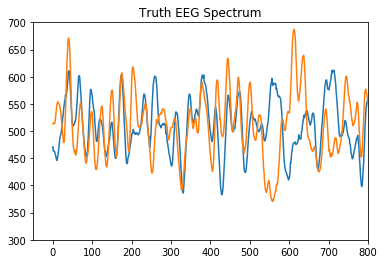

In [16]:
#Truth EEG spectrum
#(This can differ everytime this notebook is run, as the order of the data is randomized)
plt.plot(x_train[6])
plt.title("Truth EEG Spectrum")
plt.xlim(right = 800)
plt.ylim(300, 700)
plt.show()

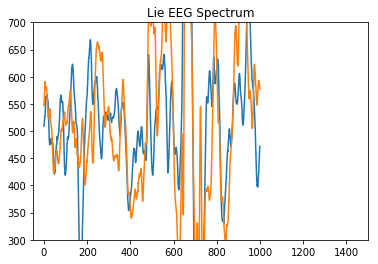

In [17]:
#Lie EEG Spectrum
#(This can differ everytime this notebook is run, as the order of the data is randomized)
plt.plot(x_train[60])
plt.title("Lie EEG Spectrum")
plt.xlim(right = 1500)
plt.ylim(300, 700)
plt.show()

In [9]:
#Create model
model2 = Sequential()
model2.add(LSTM(100, input_shape = (1500, 2), dropout = 0.2))
model2.add(Dense(1, activation = 'sigmoid'))

In [47]:
#Model summary
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 100)               41200     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train model
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.fit(x_train, y_train, validation_split = 0.3, epochs = 20, batch_size = 32)

Train on 112 samples, validate on 48 samples
Epoch 1/20
112/112 [==============================] - 15s 130ms/step - loss: 0.6950 - acc: 0.5536 - val_loss: 0.6996 - val_acc: 0.3750
Epoch 2/20


In [25]:
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (1500, 2), dropout = 0.5))
model.add(LSTM(128, return_sequences = True, input_shape = (1500, 2), dropout = 0.5))
model.add(LSTM(64, input_shape = (1500, 2), dropout = 0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1500, 256)         265216    
_________________________________________________________________
lstm_5 (LSTM)                (None, 1500, 128)         197120    
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 511,809
Trainable params: 511,809
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, batch_size = 32)

Train on 112 samples, validate on 48 samples
Epoch 1/20
112/112 [==============================] - 131s 1s/step - loss: 0.6880 - acc: 0.5625 - val_loss: 0.7292 - val_acc: 0.3750
Epoch 2/20
112/112 [==============================] - 124s 1s/step - loss: 0.6857 - acc: 0.5625 - val_loss: 0.7325 - val_acc: 0.3750
Epoch 3/20
112/112 [==============================] - 115s 1s/step - loss: 0.6878 - acc: 0.5536 - val_loss: 0.7296 - val_acc: 0.3750
Epoch 4/20
112/112 [==============================] - 112s 997ms/step - loss: 0.6922 - acc: 0.5536 - val_loss: 0.7264 - val_acc: 0.3750
Epoch 5/20
112/112 [==============================] - 114s 1s/step - loss: 0.6831 - acc: 0.5625 - val_loss: 0.7282 - val_acc: 0.3750
Epoch 6/20
112/112 [==============================] - 117s 1s/step - loss: 0.6850 - acc: 0.5625 - val_loss: 0.7320 - val_acc: 0.3750
Epoch 7/20
112/112 [==============================] - 123s 1s/step - loss: 0.6836 - acc: 0.5625 - val_loss: 0.7266 - val_acc: 0.3750
Epoch 8/20
112/112 [=

In [40]:
#Prediction
predictX = x_train[:10].reshape((10, 1500, 2))

In [41]:
model2.predict(predictX)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [42]:
#Actual value
y_train[:10]

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

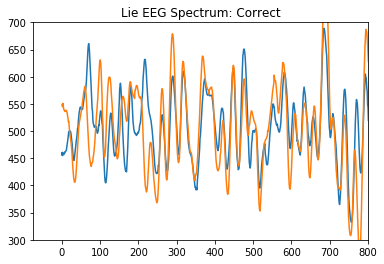

In [23]:
#Plot the lie spectrum which it got correct
plt.plot(x_train[40])
plt.title("Lie EEG Spectrum: Correct")
plt.xlim(right = 800)
plt.ylim(300, 700)
plt.show()